In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir("data"))

['.DS_Store', 'melb_data.csv']


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
import seaborn as sns

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [197]:
data = pd.read_csv("data/melb_data.csv")

In [6]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
data.shape

(13580, 21)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [9]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [10]:
data.mean()

Rooms            2.937997e+00
Price            1.075684e+06
Distance         1.013778e+01
Postcode         3.105302e+03
Bedroom2         2.914728e+00
Bathroom         1.534242e+00
Car              1.610075e+00
Landsize         5.584161e+02
BuildingArea     1.519676e+02
YearBuilt        1.964684e+03
Lattitude       -3.780920e+01
Longtitude       1.449952e+02
Propertycount    7.454417e+03
dtype: float64

In [11]:
data.values


array([['Abbotsford', '85 Turner St', 2, ..., 144.9984,
        'Northern Metropolitan', 4019.0],
       ['Abbotsford', '25 Bloomburg St', 2, ..., 144.9934,
        'Northern Metropolitan', 4019.0],
       ['Abbotsford', '5 Charles St', 3, ..., 144.9944,
        'Northern Metropolitan', 4019.0],
       ...,
       ['Williamstown', '83 Power St', 3, ..., 144.88738,
        'Western Metropolitan', 6380.0],
       ['Williamstown', '96 Verdon St', 4, ..., 144.89299,
        'Western Metropolitan', 6380.0],
       ['Yarraville', '6 Agnes St', 4, ..., 144.88449,
        'Western Metropolitan', 6543.0]], dtype=object)

In [12]:
data.var

<bound method DataFrame.var of                   Suburb              Address  Rooms Type      Price Method  \
0             Abbotsford         85 Turner St      2    h  1480000.0      S   
1             Abbotsford      25 Bloomburg St      2    h  1035000.0      S   
2             Abbotsford         5 Charles St      3    h  1465000.0     SP   
3             Abbotsford     40 Federation La      3    h   850000.0     PI   
4             Abbotsford          55a Park St      4    h  1600000.0     VB   
5             Abbotsford       129 Charles St      2    h   941000.0      S   
6             Abbotsford         124 Yarra St      3    h  1876000.0      S   
7             Abbotsford        98 Charles St      2    h  1636000.0      S   
8             Abbotsford   6/241 Nicholson St      1    u   300000.0      S   
9             Abbotsford        10 Valiant St      2    h  1097000.0      S   
10            Abbotsford   411/8 Grosvenor St      2    u   700000.0     VB   
11            Abbotsf

In [13]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Selecting numerical and categorical features

In [14]:
num_feat=data.select_dtypes(include=[np.number])
cat_feat=data.select_dtypes(include=[np.object])
print('Numerical Features:\n',num_feat.dtypes,'\n')
print('Categorical Features:\n',cat_feat.dtypes)

Numerical Features:
 Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object 

Categorical Features:
 Suburb         object
Address        object
Type           object
Method         object
SellerG        object
Date           object
CouncilArea    object
Regionname     object
dtype: object


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


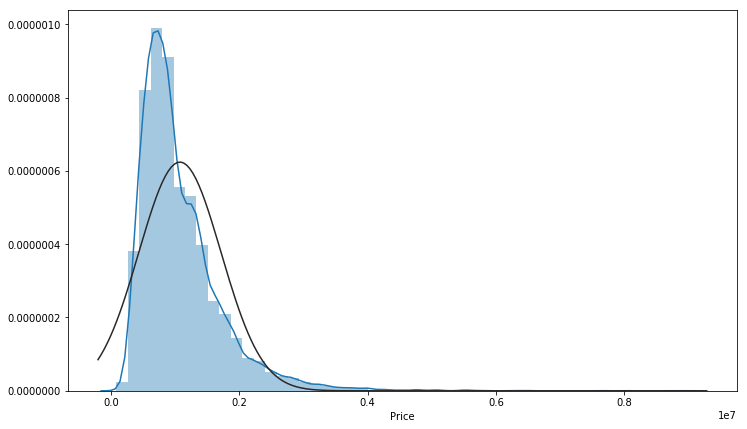

In [16]:
from scipy.stats import norm
plt.figure(figsize=(12,7))
sns.distplot(data['Price'],fit = norm);

In [17]:
data['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

#### Skewness


#### Kurtosis:


##### So we can see that our Target variable is positively skewed and is leptokur

In [18]:

#Skewness and Kurtosis for Target Variable
print('Skewness :',data['Price'].skew())
print('Kurtosis :',data['Price'].kurt())

Skewness : 2.239624312529873
Kurtosis : 9.87433888590604


## To reduce the skewness we'll take log of SalePrice


### And the skewness for the logSalePrice is 0.12 which is very close to normal

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness =  0.18065988655954393


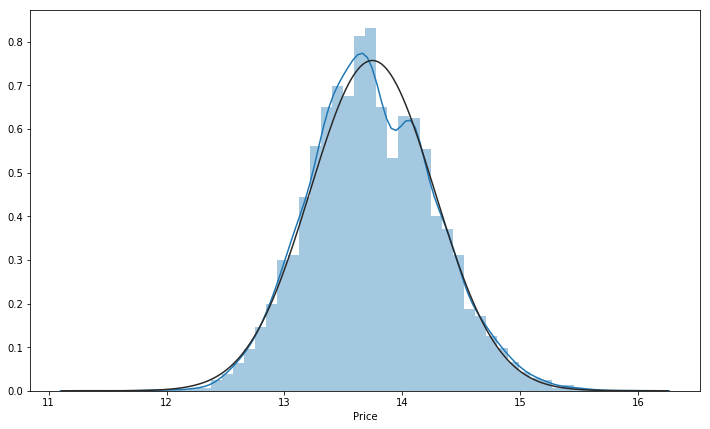

In [20]:
plt.figure(figsize=(12,7))
sns.distplot(np.log(data.Price),fit = norm);
print('Skewness = ',np.log(data.Price).skew())

In [21]:
data.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

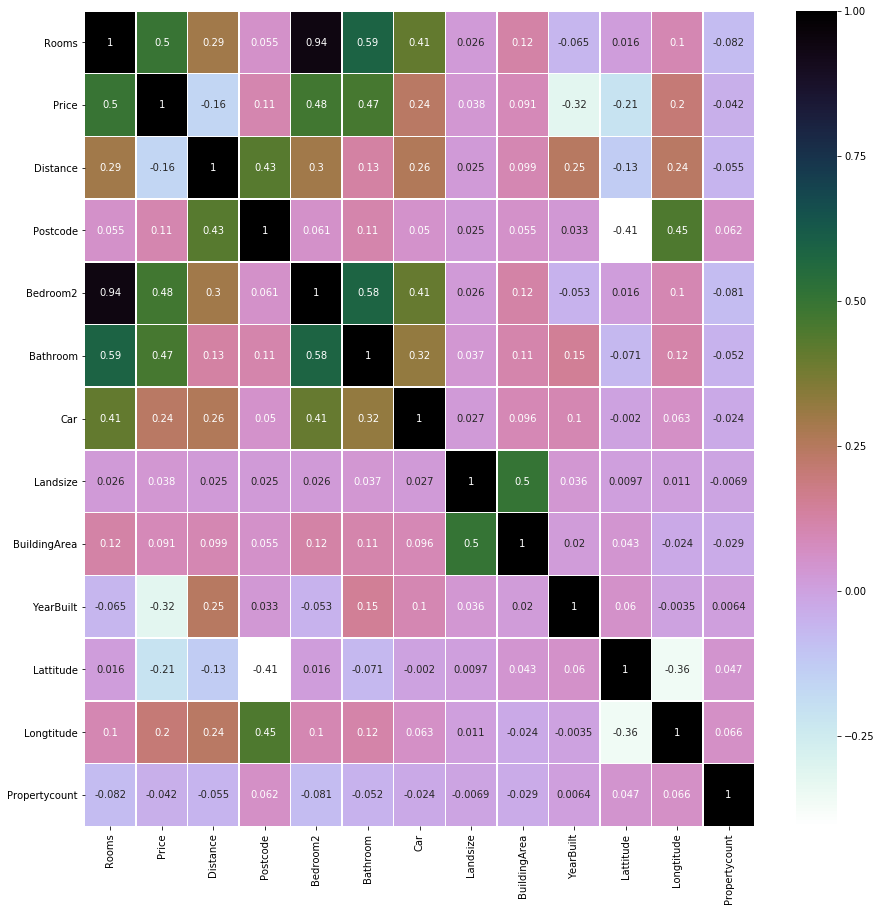

In [22]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),annot = True,linewidths = 0.5,cmap='cubehelix_r');
plt.savefig('Correlation Heatmap.png')

# Data Visualization

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


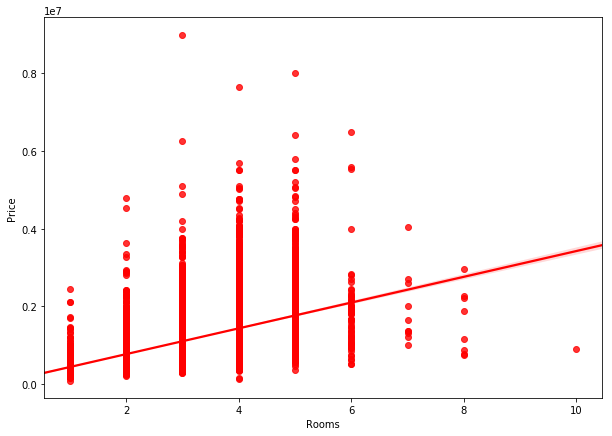

In [23]:

#Plotting regression plot for Rooms
plt.figure(figsize = (10,7))
sns.regplot(x='Rooms', y='Price', data=data, color='red')

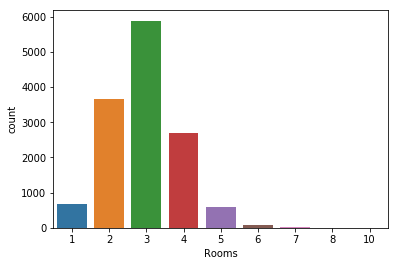

In [24]:
sns.countplot(x = 'Rooms', data=data)

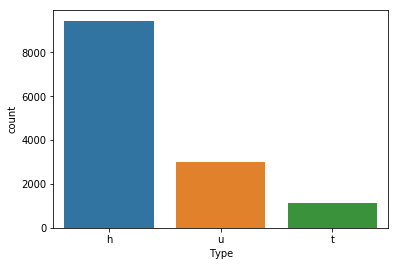

In [26]:
sns.countplot(x = 'Type', data=data)

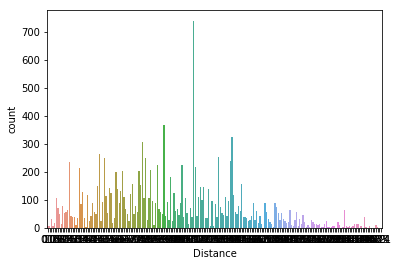

In [28]:
sns.countplot(x = 'Distance', data=data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


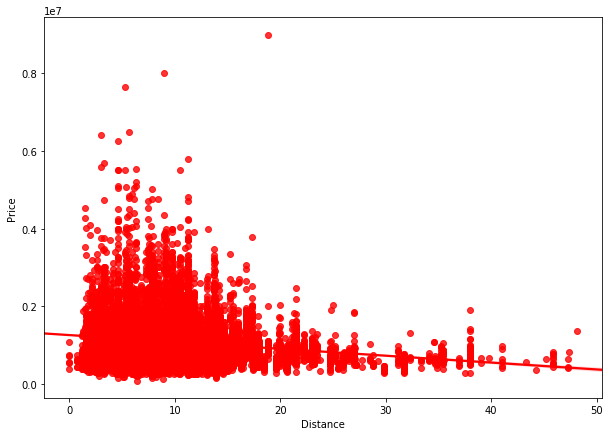

In [39]:
#Plotting regression plot for Distance
plt.figure(figsize = (10,7))
sns.regplot('Distance', 'Price', data=data, color='red')

In [37]:
data['Price'] =  data['Price'].astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


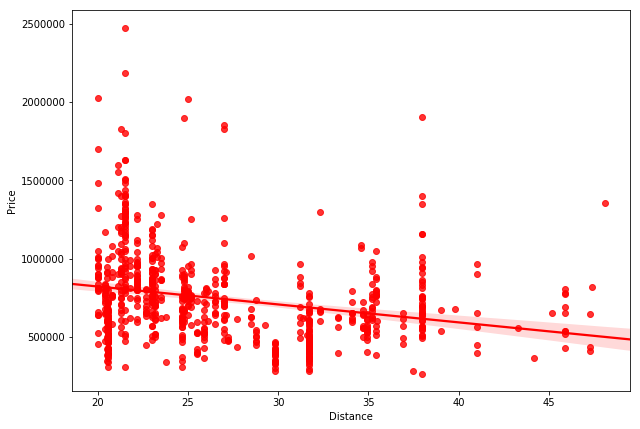

In [52]:
data = data.drop(data[(data['Distance'] < 30) & (data['Price']<10000)].index)
plt.figure(figsize = (10,7))
sns.regplot('Distance','Price',data=data, color = 'red')


In [58]:
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


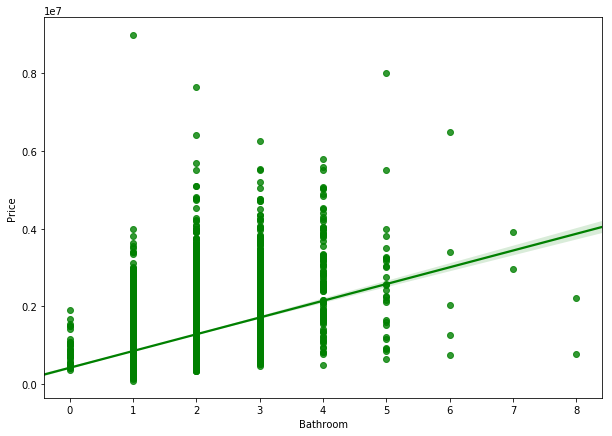

In [62]:

#Visualizing Garage Bathroom
#lol = data.drop(data[(data['Distance'] < 30) & (data['Price']<10000)].index)
plt.figure(figsize=(10,7))
sns.regplot('Bathroom','Price',data=data,color='green');

## Data Cleaning

In [207]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [208]:
data= data.dropna()

In [209]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [63]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


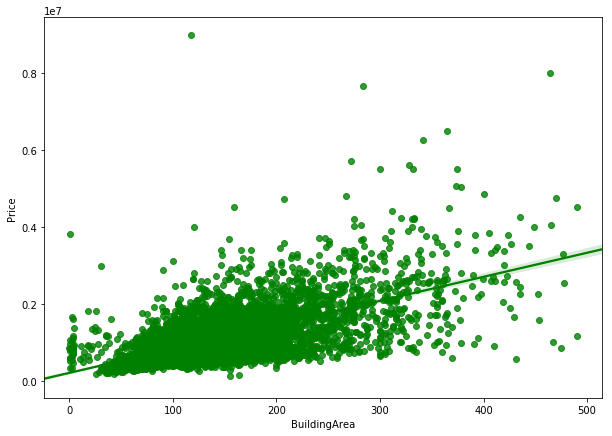

In [98]:

#Removing Outliers from the BuildingArea
data = data[data['BuildingArea']<500]
plt.figure(figsize=(10,7))
sns.regplot('BuildingArea','Price',data=data,color='green');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


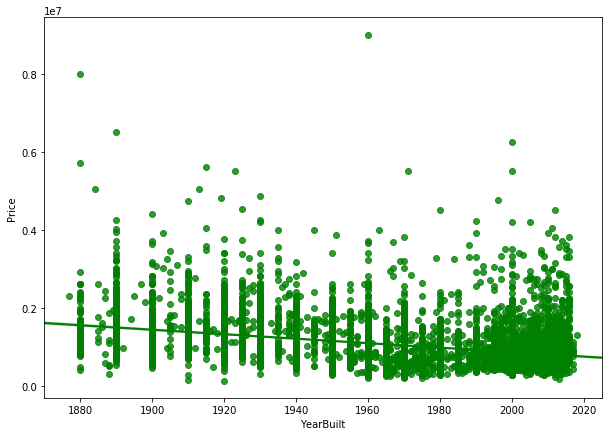

In [101]:
#Removing Outliers from the YearBuilt
data = data[data['YearBuilt']>1875]
plt.figure(figsize=(10,7))
sns.regplot('YearBuilt','Price',data=data,color='green');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


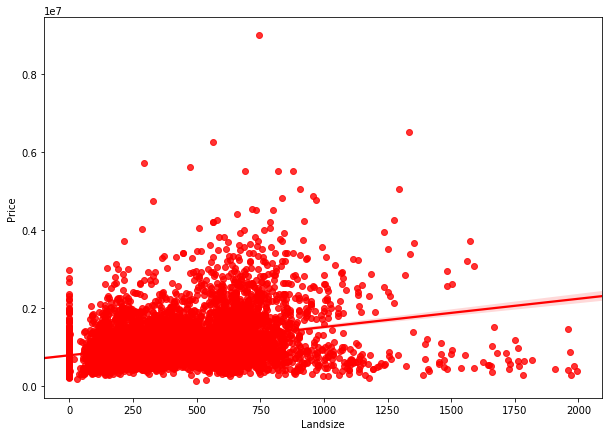

In [108]:
#Visualizing TLandSize
data = data[data['Landsize']<2000]
plt.figure(figsize=(10,7))
sns.regplot('Landsize','Price',data=data,color='Red');


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


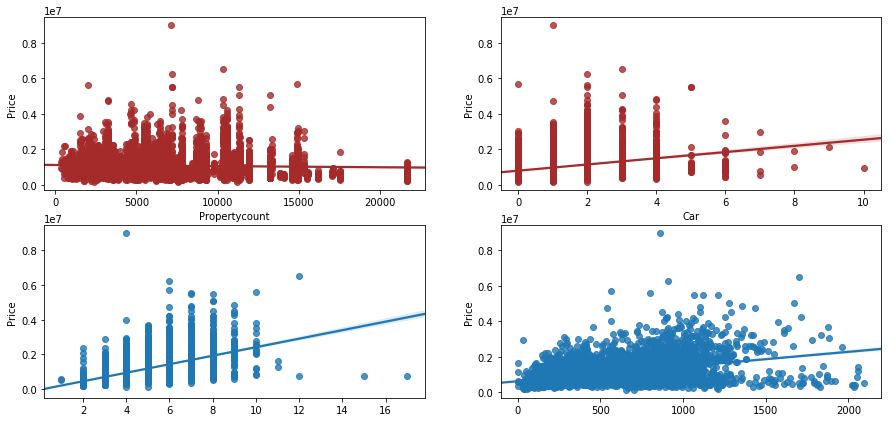

In [113]:
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.regplot('Propertycount','Price',data=data,color = 'Brown');
plt.subplot(222)
sns.regplot('Car','Price',data=data,color = 'Brown');
plt.subplot(223)
sns.regplot(data['Bedroom2'] + data['Bathroom'],data['Price']);
plt.subplot(224)
sns.regplot(data['Landsize'] + data['BuildingArea'],data['Price']);



In [109]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [110]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


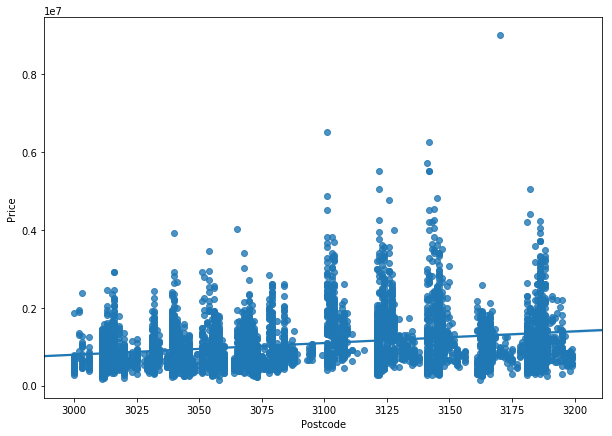

In [115]:
data = data[data['Postcode']<3200]
plt.figure(figsize=(10,7))

sns.regplot('Postcode','Price',data=data);  #we can see the ou

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


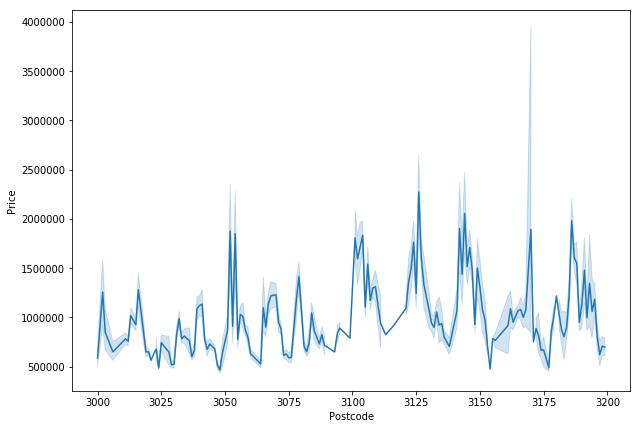

In [119]:
data = data[data['Postcode']<3200]
plt.figure(figsize=(10,7))

sns.lineplot('Postcode','Price',data=data);  #we can see the ou,stripplot, swarmplot

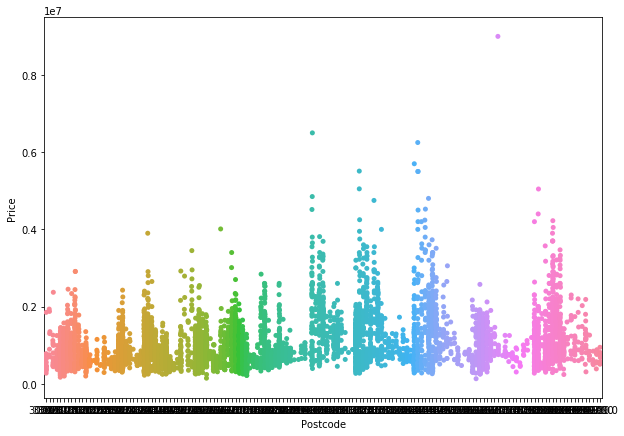

In [120]:
data = data[data['Postcode']<3200]
plt.figure(figsize=(10,7))

sns.stripplot('Postcode','Price',data=data, jitter=True);  #we can see the ou,stripplot, swarmplot

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


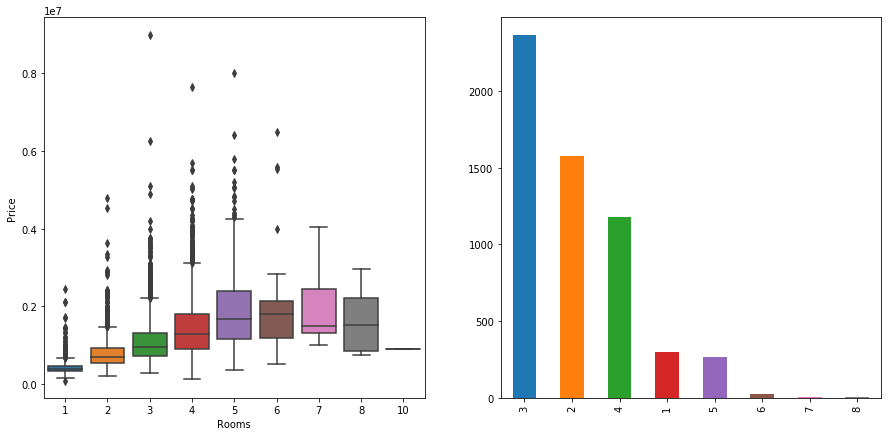

In [123]:

plt.figure(figsize= (15,7))
plt.subplot(121)
sns.boxplot(train['Rooms'], train['Price']);
plt.subplot(122)
data['Rooms'].value_counts().plot(kind="bar");
plt.savefig('Rooms Vs Price.png')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


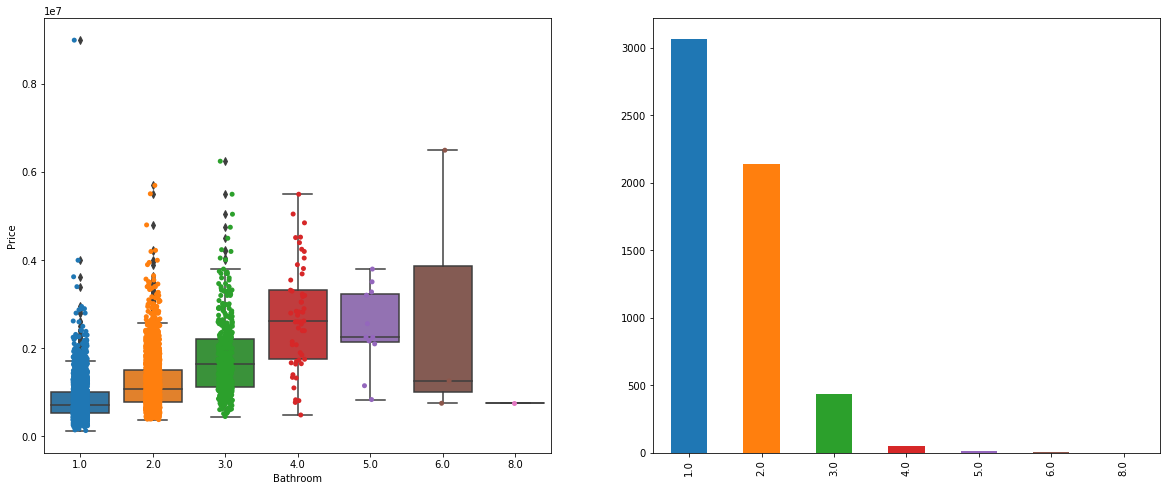

In [124]:
plt.figure(figsize= (20,8))
plt.subplot(121)
sns.boxplot(data['Bathroom'], data['Price']);
sns.stripplot(data["Bathroom"],data["Price"], jitter=True, edgecolor="gray")
plt.subplot(122)
data['Bathroom'].value_counts().plot(kind="bar");
plt.savefig('TotRmsAbvGrd Vs SalePrice.png')

#Sample size is decreasing after Total rooms above grade reache

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


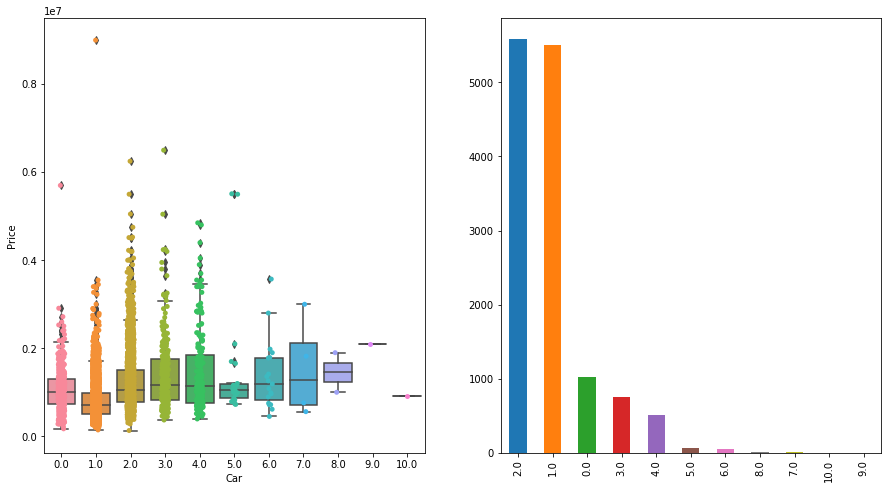

In [125]:
plt.figure(figsize= (15,8))
plt.subplot(121)
sns.boxplot(data['Car'], data['Price']);
sns.stripplot(data["Car"],data["Price"], jitter=True, edgecolor="gray")
plt.subplot(122)
train['Car'].value_counts().plot(kind="bar");
plt.savefig('GarageCars Vs SalePrice.png')
#Median Sale Price going down after 4 Garagecars is undestandable after plotting the points on boxes.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


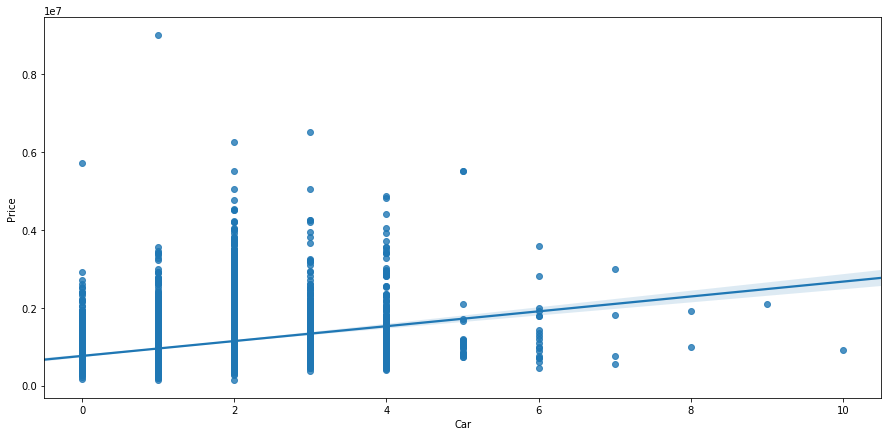

In [126]:
plt.figure(figsize=(15,7))
sns.regplot('Car', "Price",data=data)

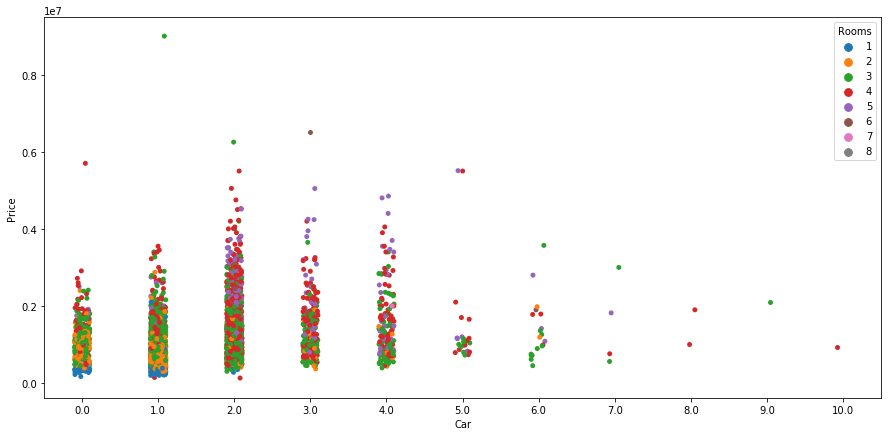

In [131]:
plt.figure(figsize=(15,7))
sns.stripplot('Car', "Price",hue="Rooms",data=data, jitter=True)

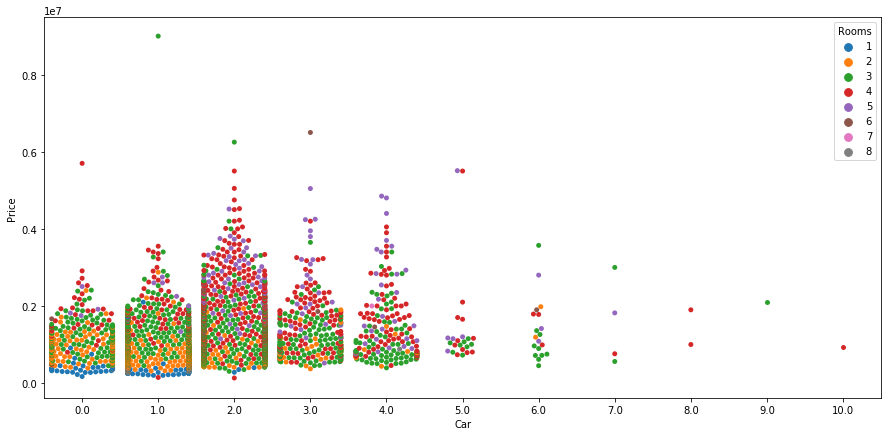

In [133]:
plt.figure(figsize=(15,7))
sns.swarmplot('Car', "Price",hue="Rooms",data=data)

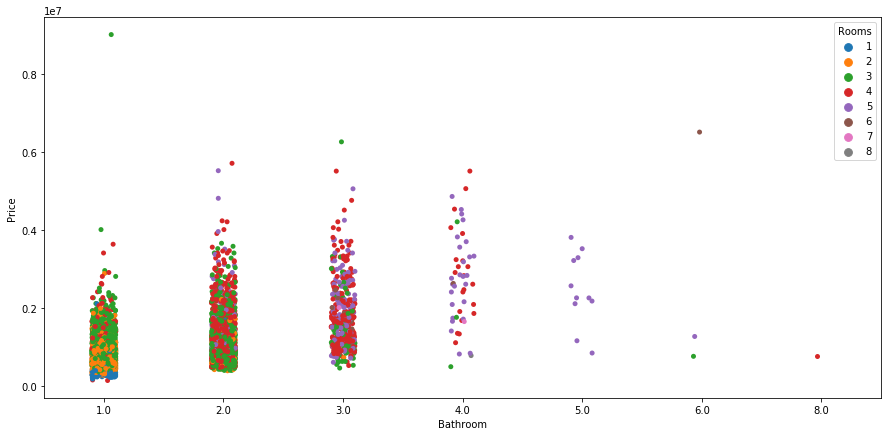

In [134]:
plt.figure(figsize=(15,7))
sns.stripplot('Bathroom', "Price",hue="Rooms",data=data, jitter=True)

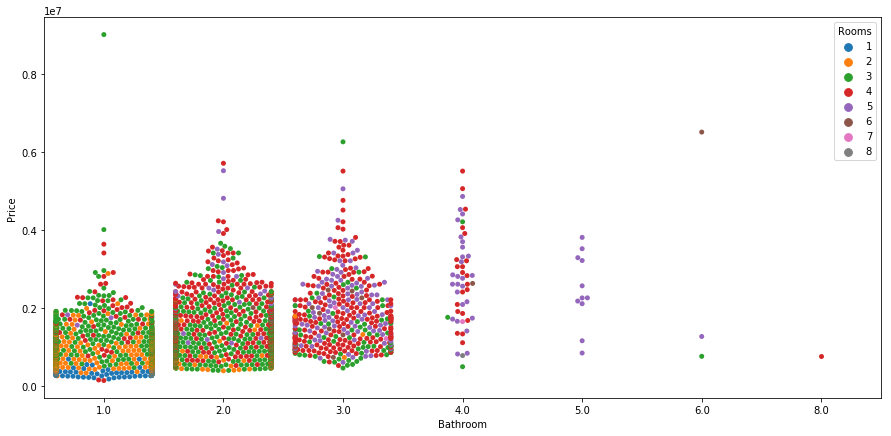

In [136]:
plt.figure(figsize=(15,7))
sns.swarmplot('Bathroom', "Price",hue="Rooms",data=data)

In [137]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# Data Preprocessing and Cleaning

In [145]:
data['log_Price'] = np.log(data['Price'] + 1)
prices = data[['Price', 'log_Price']]

prices.head()

,Price,log_Price
0,1480000.0,14.207553
1,1035000.0,13.849913
2,1465000.0,14.197366
3,850000.0,13.652993
4,1600000.0,14.285515


In [146]:
train= data.drop(columns =['Price','log_Price'])

In [147]:
train.shape

(13580, 20)

In [148]:
null_data = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))

null_data.columns = ['Null Count']
null_data.index.name = 'Feature'
null_data

,Null Count
Feature,
BuildingArea,6450
YearBuilt,5375
CouncilArea,1369
Car,62
Propertycount,0
Distance,0
Address,0
Rooms,0
Type,0


In [149]:
(null_data/len(train)) * 100

,Null Count
Feature,
BuildingArea,47.496318
YearBuilt,39.580265
CouncilArea,10.081001
Car,0.456554
Propertycount,0.000000
Distance,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000


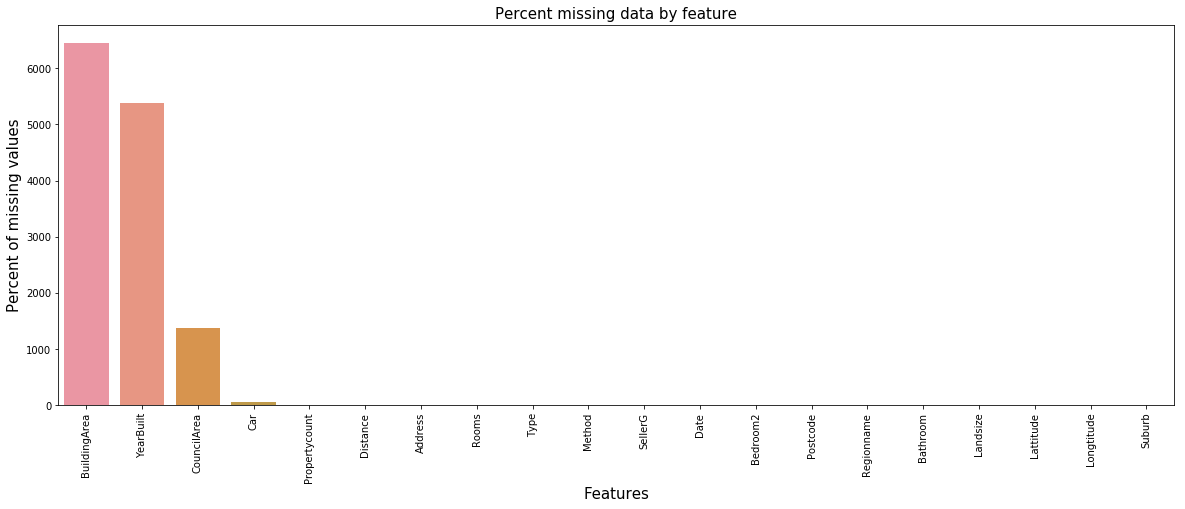

In [150]:
# Visualising missing data
f, ax = plt.subplots(figsize=(20, 7));
plt.xticks(rotation='90');
sns.barplot(x=null_data.index, y=null_data['Null Count']);
plt.xlabel('Features', fontsize=15);
plt.ylabel('Percent of missing values', fontsize=15);
plt.title('Percent missing data by feature', fontsize=15);


# Imputing Missing Values


#### In the below column, we have most of the values missing so we'll impute them with 'None'

In [204]:
for col in ('BuildingArea','CouncilArea'):
    train[col] = train[col].fillna('None')

In [205]:
for col in ('YearBuilt','Car'):
    train[col] = train[col].fillna(0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


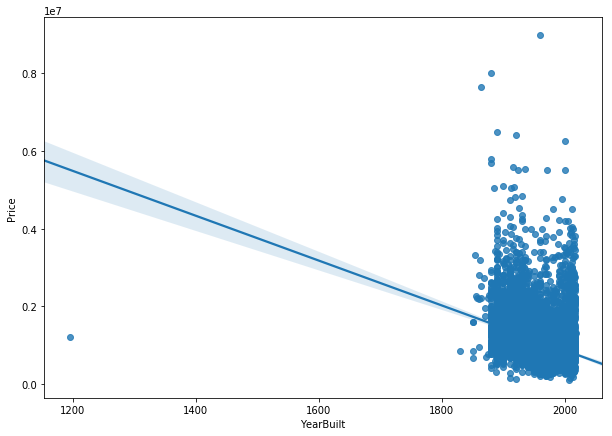

In [156]:
plt.figure(figsize=(10,7))
sns.regplot((data['YearBuilt']), prices['Price']);

#train['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

In [157]:
train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,0.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,0.0,0.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [158]:
non_numeric=train.select_dtypes(exclude=[np.number, bool])
non_numeric.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan


In [159]:
def onehot(col_list):
    global all_data
    while len(col_list) != 0:
        col = col_list.pop(0)
        data_encoded=pd.get_dummies(train[col], prefix=col)
        all_data=pd.merge(train, data_encoded, on='Id')
        all_data=all_data.drop(columns=col)
    print(all_data.shape)

In [160]:
onehot(list(non_numeric))

KeyError: 'Id'

In [168]:
def log_transform(col_list):
    transformed_col=[]
    while len(col_list)!=0:
        col=col_list.pop(0)
        if train[col].skew() > 0.5:
            train[col]=np.log(train[col]+1)
            transformed_col.append(col)
        else:
            pass
    print(f"{len(transformed_col)} features had been tranformed")
    print(train.shape)

In [169]:
numeric=train.select_dtypes(include=np.number)
log_transform(list(numeric))


2 features had been tranformed
(13580, 20)


In [170]:
print(train.shape)

(13580, 20)


In [172]:
train=train[:len(train)]

In [173]:
print(train.shape)

(13580, 20)


In [175]:
# loading pakages for model
from sklearn.linear_model import ElasticNet,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.kernel_ridge import KernelRidge

from sklearn import linear_model, model_selection, ensemble, preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [211]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [212]:
X = data[melbourne_features]

In [213]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [214]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [215]:
y = data.Price

In [216]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state = 1)
melbourne_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [217]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [236]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [219]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4337, 5)
(1859, 5)
(4337,)
(1859,)


In [220]:
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(X_train, y_train)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

255070.5608750224


In [221]:
y = data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = data[melbourne_features]


melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [222]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

434.71594577146544

In [224]:
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)



for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train,X_test, y_train,y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  370139
Max leaf nodes: 50  		 Mean Absolute Error:  275619
Max leaf nodes: 500  		 Mean Absolute Error:  245906
Max leaf nodes: 5000  		 Mean Absolute Error:  259146


In [225]:
from sklearn.ensemble import RandomForestRegressor

In [226]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

203519.2247265555


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [227]:

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

In [230]:
feature_names=list(train)
X_train = train[feature_names]
#X_test = test[feature_names]
y_train = prices['Price']

In [231]:
def score(model):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_score).mean()
    return score

## Tutorials for Models


#### Here I am adding few tutorials for people who want to know about the models I have used in prediction.


In [232]:
from IPython.display import YouTubeVideo
#Video tutorial on Bias-Variance Tradeoff

YouTubeVideo('EuBBz3bI-aA',width=700, height=350)

In [237]:
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))


model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =18)

model_KRR = make_pipeline(RobustScaler(), KernelRidge(alpha=0.029963, kernel='polynomial', degree=1.103746, coef0=5.442672))

model_XGB=xgb.XGBRegressor(n_jobs=-1, n_estimators=849, learning_rate=0.015876, 
                           max_depth=58, colsample_bytree=0.599653, colsample_bylevel=0.287441, subsample=0.154134, seed=18)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

forest_reg = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=60, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

# Predictions

In [240]:
model_Lasso.fit(X_train, y_train)
Lasso_Predictions=np.exp(model_Lasso.predict(X_test))-1

model_ENet.fit(X_train, y_train)
ENet_Predictions=np.exp(model_ENet.predict(X_test))-1



model_XGB.fit(X_train, y_train)
XGB_Predictions=np.exp(model_XGB.predict(X_test))-1

model_GBoost.fit(X_train, y_train)
GBoost_Predictions=np.exp(model_GBoost.predict(X_test))-1

model_lgb.fit(X_train, y_train)
lgb_Predictions=np.exp(model_lgb.predict(X_test))-1



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [267]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
melb_preds = reg_model.predict(X_test)
Lg  = mean_absolute_error(y_test, melb_preds)
lg

#print(mean_absolute_error(y_test, reg_model))






291733.5831097682

In [268]:

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
rnd = mean_absolute_error(y_test, melb_preds)
rnd


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


184387.45705576474

In [248]:
scores ={}
scores.update({'Lasso':score(model_Lasso)})
scores.update({"Elastic Net":score(model_ENet)})

scores.update({"XGB":score(model_XGB)})
scores.update({"Gradient Boost":score(model_GBoost)})
scores.update({"lgb":score(model_lgb)})


In [266]:

scores

{'Lasso': 490836.2918193008,
 'Elastic Net': 490833.07851996424,
 'XGB': 323151.35704557167,
 'Gradient Boost': 309513.4049103805,
 'lgb': 392612.98048282496}

In [273]:
scores['Liner Reg'] = lg
scores['Random_forest'] = rnd

In [274]:
scores


{'Lasso': 490836.2918193008,
 'Elastic Net': 490833.07851996424,
 'XGB': 323151.35704557167,
 'Gradient Boost': 309513.4049103805,
 'lgb': 392612.98048282496,
 'Liner Reg': 291733.5831097682,
 'Random_forest': 184387.45705576474}

In [275]:

scores_df =pd.DataFrame(list(scores.items()),columns=['Model','Score'])
scores_df.sort_values(['Score'])

,Model,Score
6,Random_forest,184387.457056
5,Liner Reg,291733.583110
3,Gradient Boost,309513.404910
2,XGB,323151.357046
4,lgb,392612.980483
1,Elastic Net,490833.078520
0,Lasso,490836.291819


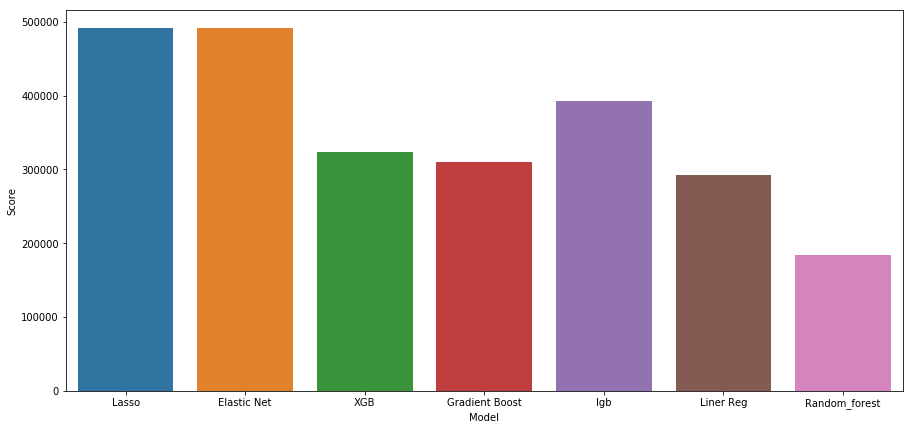

In [276]:
plt.figure(figsize=(15,7))
sns.barplot(scores_df['Model'],scores_df['Score']);

In [281]:
ensemble = (Lasso_Predictions + XGB_Predictions + lgb_Predictions + ENet_Predictions +
           GBoost_Predictions)/5

ensemble

array([inf, inf, inf, ..., inf, inf, inf])

476121.04016553296